# Instalace

Nejdříve si nainstaluj tyhle knihovny:

* Numpy
* Pillow
* Matplotlib
* IPython Notebook
* Pandas
* Pygments

Tenhle typ knihoven je nechvalně známý tím, že je docela složité je nainstalovat. I proto, že jsou zčásti napsané v jiných jazycích než je Python. V poslední době se ale jejich instalace zjednodušuje, tak to snad zvládneš i ty!

## Windows
Numpy jde nainstalovat z;  www.lfd.uci.edu/~gohlke/pythonlibs/#numpy (stáhnout a soubor nainstalovat `pip install soubor.whl`); ostatní by snad měly jít pomocí `python -m pip install jméno-knihovny`, tedy:

    > python -m pip install pillow matplotlib ipython[notebook] pandas pygments

## Linux
Nejdřív je potřeba nainstalovat závislosti. Pro Fedoru:

    $ sudo yum install python3-devel zlib-devel Cython atlas-devel lapack-devel gcc gcc-gfortran zlib-devel tk-devel libpng-devel freetype-devel libjpeg-turbo-devel

A pak, ve virtuálním prostředí:

    $ python -m pip install numpy pillow matplotlib ipython[notebook] pandas pygments


# IPython

IPython je nástroj, který zjednodušuje interaktivní práci v Pythonu, zvlášť výpočty a experimenty. Dá se spustit z příkazové řádky jako `ipython` – pak se chová podobně jako `python`, jen s barvičkama a různýma vychytávkama navíc.
My si ale vyzkoušíme *IPython Notebook*, který běží v prohlížeči, a umožní nám se vracet k předchozím příkazům, zobrazovat obrázky, nebo třeba prokládat kód hezky formátovanými poznámkami (jako je ta, kterou právě čteš).
Zadej:

    $ ipython notebook

IPython Notebook se ovládá docela intuitivně: do políčka napíšeš kód, zmáčkneš <kbd>Shift+Enter</kbd>. Kód se provede, zobrazí se výsledek, a objeví se políčko pro další kousek kódu. Když je kód špatně, dá se opravit a pomocí <kbd>Shift+Enter</kbd> spustit znovu.

# Numpy

Základní knihovna, používaná na výpočty, je Numpy, která definuje typ `array` (pole). Takové pole se chová v mnoha ohledech podobně jako seznam.
Když budeme chtít pole vytvořit, použijeme nejčastěji právě seznam (nebo jiný objekt který se dá použít pro `for` cyklus):

In [1]:
import numpy
pole = numpy.array([0, 1, 2, 3, 4, 5, 6])
pole

array([0, 1, 2, 3, 4, 5, 6])

In [2]:
pole[0]

0

In [3]:
pole[1:-2]

array([1, 2, 3, 4])

In [4]:
pole[0] = 9
pole

array([9, 1, 2, 3, 4, 5, 6])

V jiných ohledech se ale chová jinak. Například takovému poli nejde měnit velikost – nemá metody jako `append`:

In [5]:
pole.append(1)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

Další zajímavost je, že pole má daný typ prvků. Když uděláme pole celých čísel, nejdou do něj pak vkládat třeba řetězce:

In [6]:
pole[0] = 'ahoj'

ValueError: invalid literal for int() with base 10: 'ahoj'

... a pokud do takového pole přiřadíme desetinné číslo, zaokrouhlí se dolů (pomocí funkce `int`):

In [7]:
pole[0] = 3.9
pole

array([3, 1, 2, 3, 4, 5, 6])

Typ pole se dá zadat při jeho vytváření, pomocí argumentu `dtype`.

In [8]:
pole_float = numpy.array([0, 1, 2, 3, 4, 5, 6], dtype=float)
pole_float

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.])

In [9]:
pole_str = numpy.array([0, 1, 2, 3, 4, 5, 6], dtype=str)
pole_str

array(['0', '1', '2', '3', '4', '5', '6'], 
      dtype='<U1')

## Operace s poli

Aritmetické operace, jako součet, se provádí na jednotlivých prvcích – není to jako u seznamů.
Přičteme-li k poli číslo, přičte se ke všem prvkům pole; stejně u násobení atd.
Přičteme-li k poli pole, sečtou se odpovídající prvky.

In [10]:
pole1 = numpy.array(range(10))
pole1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
pole1 + 5

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [12]:
pole1 / 4

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25])

In [13]:
pole2 = numpy.array(range(-10, 20, 3))
pole2

array([-10,  -7,  -4,  -1,   2,   5,   8,  11,  14,  17])

In [14]:
pole1 + pole2

array([-10,  -6,  -2,   2,   6,  10,  14,  18,  22,  26])

In [15]:
pole1 * pole2

array([  0,  -7,  -8,  -3,   8,  25,  48,  77, 112, 153])

A jak spojit dvě pole dohromady, tak jak to dělá `+` u seznamů? Na to má Numpy [speciální funkci `hstack`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html).

In [16]:
numpy.hstack([pole1, pole2])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9, -10,  -7,  -4,
        -1,   2,   5,   8,  11,  14,  17])

Všechny funkce Numpy se dají najít v domkumentaci, i když nezasvěcení v ní můžou ze začátku docela tápat. Základní matematické funkce jso popsány pod ["Available ufuncs"](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

In [17]:
numpy.sin(pole)

array([ 0.14112001,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ])

Ještě pozor na to, že i porovnávací operátory pracují na jednotlivých prvcích. Vznikle pole `bool`ů.

In [18]:
pole1 < pole2

array([False, False, False, False, False, False,  True,  True,  True,  True], dtype=bool)

Pokud budeš chtít takové pole použít v `if`u, použij funkci `any` (vrací `True` pokud jsou některé z prvků true)  nebo `all` (vrací `True` pokud jsou všechny prvky true)

In [19]:
if any(pole1 < pole2):
    print('Některé prvky pole1 jsou menší než odpovídající prvky pole2')
if all(pole1 < pole2):
    print('Všechny prvky pole1 jsou menší než odpovídající prvky pole2')

Některé prvky pole1 jsou menší než odpovídající prvky pole2


# Pole, matematické funkce, a grafy

V praxi jsou pole, se kterými se dělá nějaké to zpracovávání dat, obrovská.
Udělej si pole s milionem prvků, pomocí funkce `linspace` která bere minimální a maximální hodnotu, a délku pole. (Zabere to několik MB paměti; pokud máš menší počítač, zkus třeba jen 10 tisíc.)

In [20]:
x = numpy.linspace(-10, 10, 1000000)
x

array([-10.     ,  -9.99998,  -9.99996, ...,   9.99996,   9.99998,  10.     ])

Pak na všechna tahle čísla zároveň zavolej funkci `sin`.
Všimni si jak je to rychlé – kdybys na to použila pythoní cyklus `for`, trvalo by to mnohem déle. Obecně je dobré, když děláš výpočty pomocí Numpy, používat pole a vestavěné funkce místo Pythoních cyklů.

In [21]:
sin_x = numpy.sin(x)
sin_x

array([ 0.54402111,  0.54400433,  0.54398755, ..., -0.54398755,
       -0.54400433, -0.54402111])

A teď si ten sinus výstup nakresli pomocí knihovny `matplotlib`. Nejdřív nějaké ty importy a nastavení: řádek začínající `%` je IPythonová vychytávka, která způsobí že se grafy vykreslí pr'imo v prohlížeči.

In [22]:
from matplotlib import pyplot

%matplotlib inline

Teď stačí použít funkci `matplotlib.pyplot.plot`, která bere (v základu) dva argumenty – pole hodnot pro `x`-ovou osu, a pole hodnot pro osu `y`-ovou.

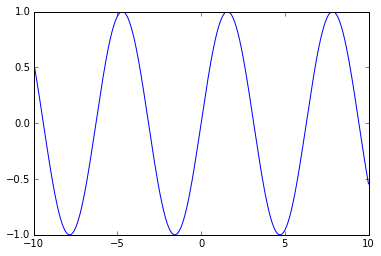

In [23]:
pyplot.plot(x, sin_x)

## Dvojrozměrná pole

Pole z Numpy ale nemusí být jen řady čísel. Můžou to být i tabulky čísel! Dvou- (a více-)rozměrným polím se říká *matice*, a chovají se trochu jako seznamy seznamů.

In [24]:
matice = numpy.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matice

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [25]:
matice[0]

array([1, 2, 3])

In [26]:
matice[0:-1]

array([[1, 2, 3],
       [4, 5, 6]])

In [27]:
matice[0][2]

3

Na rozdíl od seznamů seznamů se matice dají indexovat dvojicí čísel (nebo složitějších indexů), oddělených čárkou. Dají se tak jednoduše vybírat celé řádky nebo sloupce.

In [28]:
matice[0, 2]

3

In [29]:
matice[0, 1:]

array([2, 3])

In [30]:
matice[:, :2]

array([[1, 2],
       [4, 5],
       [7, 8]])

In [31]:
matice[::2, ::2]

array([[1, 3],
       [7, 9]])

A do vybraných řádků nebo sloupců se dají i přiřazovat hodnoty.

In [32]:
matice2 = numpy.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matice2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [33]:
matice2[1, 1] = 0
matice2

array([[1, 2, 3],
       [4, 0, 6],
       [7, 8, 9]])

In [34]:
matice2[::2, ::2] = 0
matice2

array([[0, 2, 0],
       [4, 0, 6],
       [0, 8, 0]])

In [35]:
matice2[::2, ::2] = numpy.array([[-1, -3], [-7, -9]])
matice2[1, 1] = -5
matice2

array([[-1,  2, -3],
       [ 4, -5,  6],
       [-7,  8, -9]])

Pomocí knihovny `matplotlib` si můžeme matici "nakreslit" jako orázek.

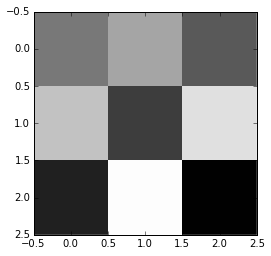

In [36]:
pyplot.imshow(matice2, interpolation='none', cmap='gray')
# Pojmenované argumenty specifikují jak přesně se graf vykreslí:
# interpolation='none' má smysl pro malé matice, a
# cmap='gray' vykresluje v odstínech šedi:
#     černá je nejmenší číslo, bílá největší

Když každému číslu přiřadit barvu, 

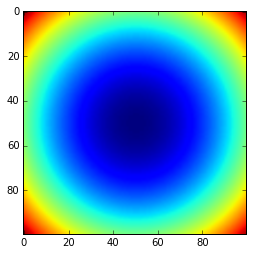

In [37]:
obrazek = numpy.zeros([100, 100])
for x in range(-50, 50):
    for y in range(-50, 50):
        obrazek[x+50, y+50] = x ** 2 + y ** 2

pyplot.imshow(obrazek)

Jak je napsáno výše, je lepší nepoužívat `for`-cykly, protože s velkou spoustou čísel by to bylo pomalé. Numpy má spoustu funkcí, které dokážou cykly nahradit – jen je potřeba je znát, či umět najít v dokumentaci. 

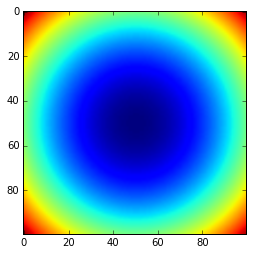

In [38]:
n = numpy.linspace(-50, 50, 1000)
x, y = numpy.meshgrid(n, n)
z = x ** 2 + y ** 2
pyplot.imshow(obrazek)

## Trojrozměrná pole?!

Pole v Numpy mohou mít i více rozměrů než dva. Trojrozměrná matice je jako seznam seznamů seznamů.
Každý pixel v obrázku, který jsme kreslily před chvílí, by sám obsahoval několik hodnot.

Příklad trojrozměrné matice je počítačový obrázek – pro každý pixel se zapisuje intenzita červené, zelené a modré barvy (angl. red, green, blue; *RGB*) – tedy 3 hodnoty. 

In [39]:
from PIL import Image

# Obrázek © Mokele, http://en.wikipedia.org/wiki/User:HCA
# http://commons.wikimedia.org/wiki/File:Ball_python_lucy.JPG

krajta = numpy.array(Image.open('krajta.jpg'))
krajta

array([[[172, 173, 165],
        [173, 174, 166],
        [173, 174, 168],
        ..., 
        [172, 171, 167],
        [173, 172, 168],
        [173, 172, 168]],

       [[175, 176, 168],
        [174, 175, 167],
        [172, 173, 167],
        ..., 
        [172, 171, 167],
        [173, 172, 168],
        [174, 173, 169]],

       [[176, 177, 169],
        [174, 175, 167],
        [171, 172, 166],
        ..., 
        [173, 172, 168],
        [173, 172, 168],
        [172, 171, 167]],

       ..., 
       [[209, 211, 206],
        [210, 212, 207],
        [211, 213, 208],
        ..., 
        [202, 203, 197],
        [200, 201, 195],
        [200, 201, 195]],

       [[208, 210, 205],
        [209, 211, 206],
        [209, 211, 206],
        ..., 
        [202, 203, 197],
        [202, 203, 197],
        [203, 204, 198]],

       [[207, 209, 204],
        [209, 211, 206],
        [210, 212, 207],
        ..., 
        [201, 202, 196],
        [201, 202, 196],
        [201, 202,

Funkce `imshow` si s takovou věcí poradí, a nakreslí obrázek správných barev. 
(Jen si pořád myslí že to je graf, tak automaticky doplní osy.)

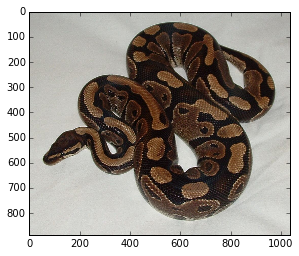

In [40]:
pyplot.imshow(krajta)

Indexování funguje stejně jako u dvourozměrných polí. V případě obrázků představuje první číslo řádek, druhé sloupec, ...

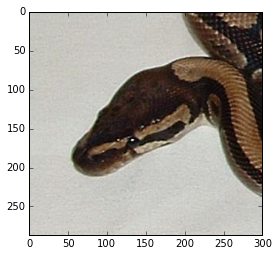

In [41]:
pyplot.imshow(krajta[400:-200, 0:300])

... a třetí index je barva. Můžeš třeba snížit intenzitu modré, aby obrázek zežloutl: 

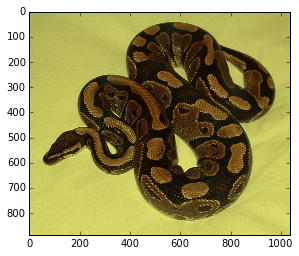

In [42]:
krajta[:, :, 2] = krajta[:, :, 2] / 2
pyplot.imshow(krajta)

(A aby se nemuselo při indexování vícerozměrných polí opakovat `:, :, :, :`, dá se to nahradit třemi tečkami:)

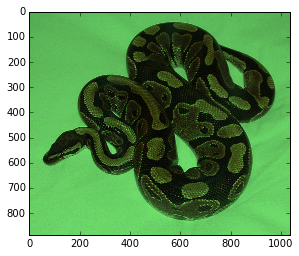

In [43]:
krajta[..., 0] = krajta[..., 0] / 2
pyplot.imshow(krajta)

# Tabulková data s Pandas

Tak, teď když něco víš o tom, jak funguje Numpy a jeho pole, můžeš se (s trochou googlení) směle pustit do analýzy obrazů, zvuků, matematických funkcí nebo fyzikálních simulací. Pokud znáš např. *Matlab*, zkus googlit "Python" + jméno funkce v Matlabu; často zjistíš že Numpy (nebo jiná knihovna, třeba Scipy) podobnou funkci obsahuje taky. A že na její použití nepotřebuješ drahou licenci :)

Většina dat, které se analyzují, nebudou matice jako takové, ale budou to tabulky se sloupečky.
My zkusíme zpracovat
[data ze sčítání lidu, domů a bytů](http://www.czso.cz/csu/redakce.nsf/i/otevrena_data_pro_vysledky_scitani_lidu_domu_a_bytu_2011_%28sldb_2011%29), které zveřejňuje Český statistický úřad. Nejvhodnější formát pro stažení je pro nás je CSV; pro porozumění si stáhni i "Popis dat" v PDF.

Koukni se stažený soubor v textovém editoru, ať vidíš o co jde. Pak ho načti pomocí Pandas:

In [44]:
import pandas

data = pandas.read_csv('SLDB_ZV.CSV', encoding='cp1250')

data.head()  # metoda head() nám ukáže jen prvních pár řádků, aby výpis nebyl tak dlouhý.

,typuz_naz,nazev,uzcis,uzkod,u01,u02,u03,u04,u05,u06,u07,u08,u09,u10,u11
0,kraj,Hlavní město Praha,100,3018,1268796,613738,655058,153622,908321,201029,644643,600730,92927,542168,579509
1,kraj,Středočeský kraj,100,3026,1289211,637252,651959,199300,895024,190911,639851,587539,286780,482860,523045
2,kraj,Jihočeský kraj,100,3034,628336,308296,320040,91119,435187,100000,307130,280844,123048,247608,262692
3,kraj,Plzeňský kraj,100,3042,570401,282137,288264,79469,396468,92734,278674,255278,105835,226298,242397
4,kraj,Karlovarský kraj,100,3051,295595,145483,150112,42159,207480,44538,139871,123100,39845,119403,128904


Názvy sloupců od ČSÚ nedávají moc smysl, tak si je přejmenuj:

In [45]:
data.columns = ['typ', 'název', 'číslo', 'kód',
                'obyvatel', 'muži', 'ženy', 'obyv_0', 'obyv_15', 'obyv_65',
                'aktivní', 'zamestnaní', 'domy', 'byty', 'domácnosti']
data.head()

,typ,název,číslo,kód,obyvatel,muži,ženy,obyv_0,obyv_15,obyv_65,aktivní,zamestnaní,domy,byty,domácnosti
0,kraj,Hlavní město Praha,100,3018,1268796,613738,655058,153622,908321,201029,644643,600730,92927,542168,579509
1,kraj,Středočeský kraj,100,3026,1289211,637252,651959,199300,895024,190911,639851,587539,286780,482860,523045
2,kraj,Jihočeský kraj,100,3034,628336,308296,320040,91119,435187,100000,307130,280844,123048,247608,262692
3,kraj,Plzeňský kraj,100,3042,570401,282137,288264,79469,396468,92734,278674,255278,105835,226298,242397
4,kraj,Karlovarský kraj,100,3051,295595,145483,150112,42159,207480,44538,139871,123100,39845,119403,128904


Data v Pandas tabulce se dají indexovat, ale na rozdíl od matic, indexy vybírají sloupce. Pokud chceš vybrat řádek musíš napsat:

In [46]:
data.loc[10]

typ                        kraj
název         Jihomoravský kraj
číslo                       100
kód                        3115
obyvatel                1163508
muži                     567882
ženy                     595626
obyv_0                   162794
obyv_15                  808861
obyv_65                  188684
aktivní                  572019
zamestnaní               511844
domy                     225006
byty                     443358
domácnosti               473520
Name: 10, dtype: object

Sloupce se pak indexují jménem (řetězcem), nikoli číslem:

In [47]:
data['obyvatel']

0     1268796
1     1289211
2      628336
3      570401
4      295595
5      808961
6      432439
7      547916
8      511627
9      505565
10    1163508
11     628427
12     579944
13    1205834
14      95459
...
6697       55602
6698      113200
6699       82873
6700       63261
6701       64099
6702       49272
6703       45641
6704       25126
6705       29453
6706       27375
6707       13076
6708       15262
6709       17921
6710       14124
6711    10436560
Name: obyvatel, Length: 6712, dtype: float64

Možná sis v předchozím výstupu všimla levého sloupce, který obsahuje čísla řádků. Pandas mu říká *index*. Je to speciální sloupec, který "pojmenovává" celou řádku, a vypisuje se na příhodných místech. Bylo by fajn tam mít místo čísla jméno.
Index se dá se změnit, ale musíš si dávat pozor, aby neobsahoval duplikáty. V ČR je 15 obcí jménem `'Nová Ves'`, takže nemůžeme jednoznačně pojmenovat jenom jménem.
Naštěstí Pandas umí takzvané *složené indexy*, takže můžeme zkombinovat číslo řádku (kvůli unikátnosti) a jméno (pro přehlednost):

In [48]:
data.set_index([data.index, 'název'], drop=False, inplace=True)
data.head()

,,typ,název,číslo,kód,obyvatel,muži,ženy,obyv_0,obyv_15,obyv_65,aktivní,zamestnaní,domy,byty,domácnosti
,název,,,,,,,,,,,,,,,
0,Hlavní město Praha,kraj,Hlavní město Praha,100,3018,1268796,613738,655058,153622,908321,201029,644643,600730,92927,542168,579509
1,Středočeský kraj,kraj,Středočeský kraj,100,3026,1289211,637252,651959,199300,895024,190911,639851,587539,286780,482860,523045
2,Jihočeský kraj,kraj,Jihočeský kraj,100,3034,628336,308296,320040,91119,435187,100000,307130,280844,123048,247608,262692
3,Plzeňský kraj,kraj,Plzeňský kraj,100,3042,570401,282137,288264,79469,396468,92734,278674,255278,105835,226298,242397
4,Karlovarský kraj,kraj,Karlovarský kraj,100,3051,295595,145483,150112,42159,207480,44538,139871,123100,39845,119403,128904


In [49]:
data['obyvatel']

    název               
0   Hlavní město Praha      1268796
1   Středočeský kraj        1289211
2   Jihočeský kraj           628336
3   Plzeňský kraj            570401
4   Karlovarský kraj         295595
5   Ústecký kraj             808961
6   Liberecký kraj           432439
7   Královéhradecký kraj     547916
8   Pardubický kraj          511627
9   Kraj Vysočina            505565
10  Jihomoravský kraj       1163508
11  Olomoucký kraj           628427
12  Zlínský kraj             579944
13  Moravskoslezský kraj    1205834
14  Benešov                   95459
...
6697  Praha 9               55602
6698  Praha 10             113200
6699  Praha 11              82873
6700  Praha 12              63261
6701  Praha 13              64099
6702  Praha 14              49272
6703  Praha 15              45641
6704  Praha 16              25126
6705  Praha 17              29453
6706  Praha 18              27375
6707  Praha 19              13076
6708  Praha 20              15262
6709  Praha 21         

Při aritmetických operacích se sloupečky chovají podobně jako matice: operace se provede nad odpovídajícími hodnotami. Dá se třeba jednoduše zjistit poměr počtů mužů a žen:

In [50]:
data['ženy'] / data['muži']

    název               
0   Hlavní město Praha      1.067325
1   Středočeský kraj        1.023079
2   Jihočeský kraj          1.038093
3   Plzeňský kraj           1.021716
4   Karlovarský kraj        1.031818
5   Ústecký kraj            1.035363
6   Liberecký kraj          1.044271
7   Královéhradecký kraj    1.037112
8   Pardubický kraj         1.027771
9   Kraj Vysočina           1.020676
10  Jihomoravský kraj       1.048855
11  Olomoucký kraj          1.056869
12  Zlínský kraj            1.052899
13  Moravskoslezský kraj    1.056022
14  Benešov                 1.026085
...
6697  Praha 9            1.051129
6698  Praha 10           1.126740
6699  Praha 11           1.083440
6700  Praha 12           1.052729
6701  Praha 13           1.061326
6702  Praha 14           1.006679
6703  Praha 15           1.049347
6704  Praha 16           1.022051
6705  Praha 17           1.063980
6706  Praha 18           1.002853
6707  Praha 19           0.998166
6708  Praha 20           1.026288
6709  Pr

Následující kód přidá vypočítaná data do tabulky jako nový sloupec:

In [51]:
data['poměr'] = data['ženy'] / data['muži']
data.head()

,,typ,název,číslo,kód,obyvatel,muži,ženy,obyv_0,obyv_15,obyv_65,aktivní,zamestnaní,domy,byty,domácnosti,poměr
,název,,,,,,,,,,,,,,,,
0,Hlavní město Praha,kraj,Hlavní město Praha,100,3018,1268796,613738,655058,153622,908321,201029,644643,600730,92927,542168,579509,1.067325
1,Středočeský kraj,kraj,Středočeský kraj,100,3026,1289211,637252,651959,199300,895024,190911,639851,587539,286780,482860,523045,1.023079
2,Jihočeský kraj,kraj,Jihočeský kraj,100,3034,628336,308296,320040,91119,435187,100000,307130,280844,123048,247608,262692,1.038093
3,Plzeňský kraj,kraj,Plzeňský kraj,100,3042,570401,282137,288264,79469,396468,92734,278674,255278,105835,226298,242397,1.021716
4,Karlovarský kraj,kraj,Karlovarský kraj,100,3051,295595,145483,150112,42159,207480,44538,139871,123100,39845,119403,128904,1.031818


Podobně jako `/` se dá použít i většina ostatních operátorů, třeba `==`:

In [52]:
data['typ'] == 'kraj'

    název               
0   Hlavní město Praha       True
1   Středočeský kraj         True
2   Jihočeský kraj           True
3   Plzeňský kraj            True
4   Karlovarský kraj         True
5   Ústecký kraj             True
6   Liberecký kraj           True
7   Královéhradecký kraj     True
8   Pardubický kraj          True
9   Kraj Vysočina            True
10  Jihomoravský kraj        True
11  Olomoucký kraj           True
12  Zlínský kraj             True
13  Moravskoslezský kraj     True
14  Benešov                 False
...
6697  Praha 9            False
6698  Praha 10           False
6699  Praha 11           False
6700  Praha 12           False
6701  Praha 13           False
6702  Praha 14           False
6703  Praha 15           False
6704  Praha 16           False
6705  Praha 17           False
6706  Praha 18           False
6707  Praha 19           False
6708  Praha 20           False
6709  Praha 21           False
6710  Praha 22           False
6711  Česká republika    Fa

A speciální vychytávka: sloupcem typu `bool` se dá indexovat, a vybrat tak příslušné řádky tabulky.
Takhle se tvoří tabulka, ve které jsou jenom kraje:

In [53]:
kraje = data[data['typ'] == 'kraj']
kraje

,,typ,název,číslo,kód,obyvatel,muži,ženy,obyv_0,obyv_15,obyv_65,aktivní,zamestnaní,domy,byty,domácnosti,poměr
,název,,,,,,,,,,,,,,,,
0,Hlavní město Praha,kraj,Hlavní město Praha,100,3018,1268796,613738,655058,153622,908321,201029,644643,600730,92927,542168,579509,1.067325
1,Středočeský kraj,kraj,Středočeský kraj,100,3026,1289211,637252,651959,199300,895024,190911,639851,587539,286780,482860,523045,1.023079
2,Jihočeský kraj,kraj,Jihočeský kraj,100,3034,628336,308296,320040,91119,435187,100000,307130,280844,123048,247608,262692,1.038093
3,Plzeňský kraj,kraj,Plzeňský kraj,100,3042,570401,282137,288264,79469,396468,92734,278674,255278,105835,226298,242397,1.021716
4,Karlovarský kraj,kraj,Karlovarský kraj,100,3051,295595,145483,150112,42159,207480,44538,139871,123100,39845,119403,128904,1.031818
5,Ústecký kraj,kraj,Ústecký kraj,100,3069,808961,397453,411508,121692,565358,117899,377298,325987,115679,330981,352346,1.035363
6,Liberecký kraj,kraj,Liberecký kraj,100,3077,432439,211537,220902,64597,301267,64949,208512,185944,73380,171328,183299,1.044271
7,Královéhradecký kraj,kraj,Královéhradecký kraj,100,3085,547916,268967,278949,79127,374898,92020,260819,238986,109736,215277,228256,1.037112
8,Pardubický kraj,kraj,Pardubický kraj,100,3093,511627,252310,259317,75093,352543,82330,246779,224590,104850,196288,207396,1.027771


Když budeš chtít vybrat víc sloupců, dá se indexovat i seznamem řetězců:

In [54]:
kraje[['název', 'číslo']]

,,název,číslo
,název,,
0,Hlavní město Praha,Hlavní město Praha,100
1,Středočeský kraj,Středočeský kraj,100
2,Jihočeský kraj,Jihočeský kraj,100
3,Plzeňský kraj,Plzeňský kraj,100
4,Karlovarský kraj,Karlovarský kraj,100
5,Ústecký kraj,Ústecký kraj,100
6,Liberecký kraj,Liberecký kraj,100
7,Královéhradecký kraj,Královéhradecký kraj,100
8,Pardubický kraj,Pardubický kraj,100


No a nakonec si ukážeme nějaké ty grafy a obrázky.

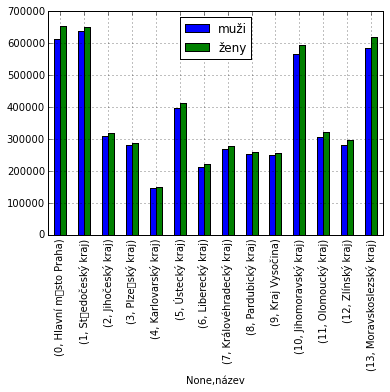

In [55]:
kraje[['muži', 'ženy']].plot(kind='bar')

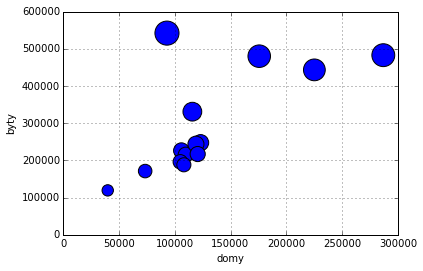

In [56]:
kraje.plot(kind='scatter', x='domy', y='byty', s=kraje['domácnosti']/1000)

a další viz [dokumentace k funkci `plot()`](http://pandas.pydata.org/pandas-docs/stable/visualization.html)